In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def custom_palette(custom_colors):
  customPalette = sns.set_palette(sns.color_palette(custom_colors))
  sns.palplot(sns.color_palette(custom_colors), size=0.8)
  plt.tick_params(axis='both', labelsize=0, length=0)

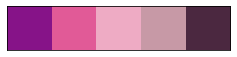

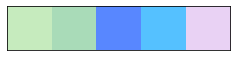

In [3]:
pink = ["#861388", "#E15A97", "#EEABC4", "#C799A6", "#4B2840"]
blue = ["#C6EBBE", "#A9DBB8", "#5887FF", "#55C1FF", "#E9D2F4"]
custom_palette(pink)
custom_palette(blue)

In [5]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

display(train_df)
display(test_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C
...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,NaN,Q
99996,199996,1,"Brown, Howard",male,59.0,1,0,13004,68.31,NaN,S
99997,199997,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,NaN,S
99998,199998,1,"Jacobsen, Margaret",female,49.0,1,2,PC 26988,29.68,B20828,C


In [7]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Name         100000 non-null  object 
 3   Sex          100000 non-null  object 
 4   Age          96513 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Ticket       94819 non-null   object 
 8   Fare         99867 non-null   float64
 9   Cabin        29169 non-null   object 
 10  Embarked     99723 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 6.5+ MB


None

In [9]:
print(train_df.shape)
print(test_df.shape)

(100000, 12)
(100000, 11)


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [11]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96513.000000,100000.000000,100000.00000,99867.000000
mean,149999.500000,2.368930,30.565796,0.486550,0.49283,45.374804
std,28867.657797,0.878458,14.054634,0.771262,0.92360,65.204725
min,100000.000000,1.000000,0.080000,0.000000,0.00000,0.050000
25%,124999.750000,1.000000,21.000000,0.000000,0.00000,10.130000
50%,149999.500000,3.000000,27.000000,0.000000,0.00000,13.980000
75%,174999.250000,3.000000,40.000000,1.000000,1.00000,37.390000
max,199999.000000,3.000000,81.000000,8.000000,9.00000,680.700000


In [12]:
train_df.columns = [column.lower() for column in train_df.columns]
test_df.columns = [column.lower() for column in test_df.columns]

feature_cols = train_df.drop(['survived', 'passengerid'], axis=1).columns
target_column = 'survived'

numerical_columns = ['age', 'fare']
categorical_columns = train_df[feature_cols].drop(columns=numerical_columns).columns

pure_num_cols = train_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns
pure_cat_cols = train_df[feature_cols].select_dtypes(exclude=['int64', 'float64']).columns

print(len(numerical_columns), len(categorical_columns))

2 8


In [13]:
train_df.isnull().sum()

passengerid        0
survived           0
pclass             0
name               0
sex                0
age             3292
sibsp              0
parch              0
ticket          4623
fare             134
cabin          67866
embarked         250
dtype: int64

In [14]:
test_df.isnull().sum()

passengerid        0
pclass             0
name               0
sex                0
age             3487
sibsp              0
parch              0
ticket          5181
fare             133
cabin          70831
embarked         277
dtype: int64

In [15]:
train_df['survived'].head()

0    1
1    0
2    0
3    0
4    1
Name: survived, dtype: int64

In [18]:
fig = px.histogram(train_df, x=target_column, color=target_column)

fig.update_layout(
  title_text='Survived distribution',
  xaxis_title_text='Value',
  yaxis_title_text='Count',
  bargap=0.2,
  plot_bgcolor=pink[1]
)
fig.show(())

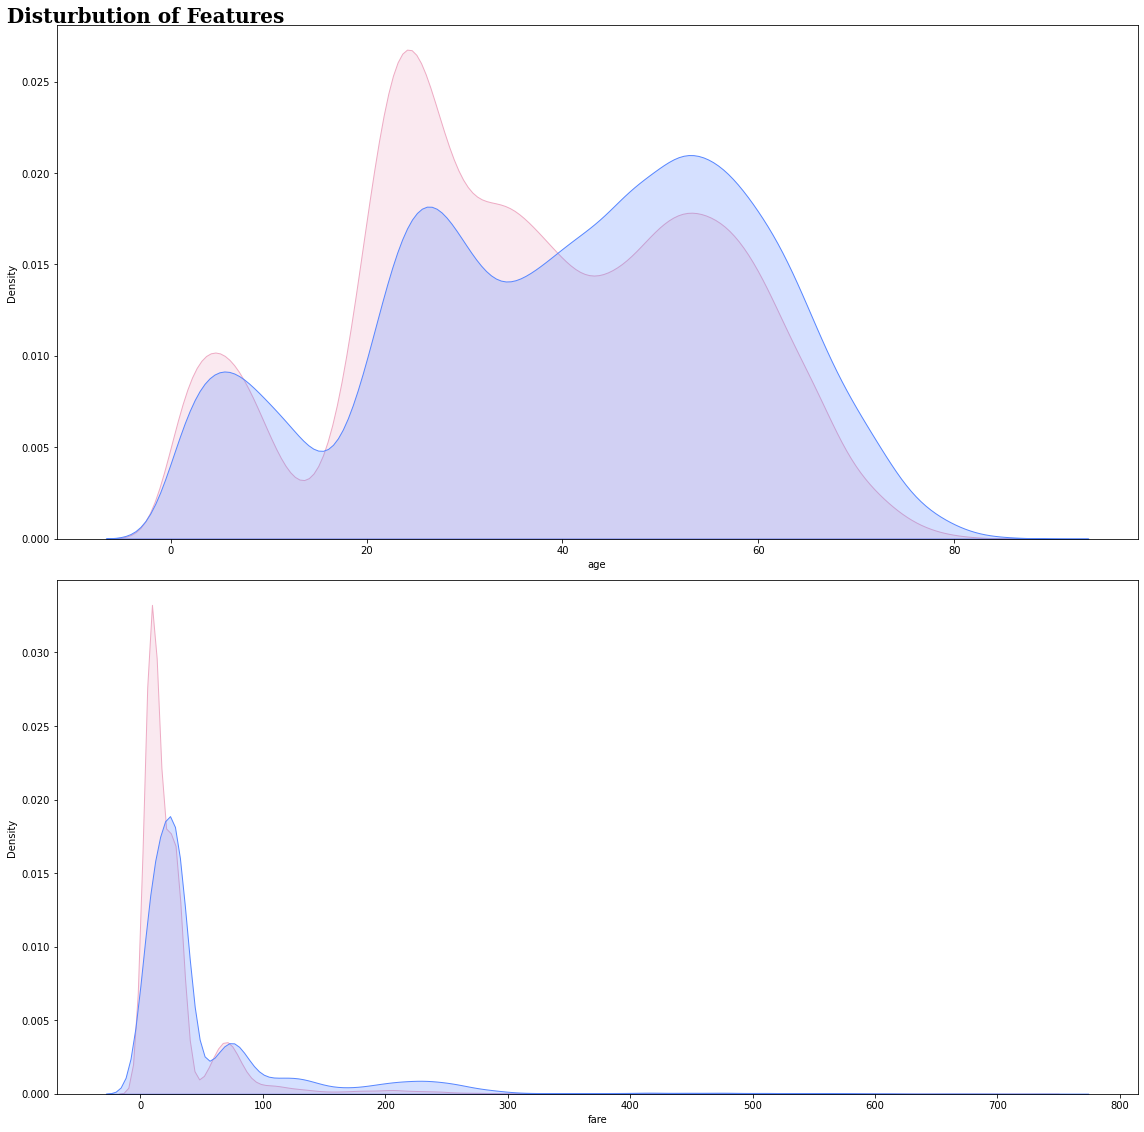

In [21]:
num_rows, num_cols = 2, 1
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))
fig.suptitle("Disturbution of Features", fontsize=20, fontweight='bold', fontfamily='serif', x=0.13)

for index, column in enumerate(train_df[numerical_columns].columns):
  i, j = (index // num_cols, index % num_cols)
  sns.kdeplot(train_df.loc[train_df[target_column] == 0, column], color=pink[2], shade=True, ax=ax[i])
  sns.kdeplot(train_df.loc[train_df[target_column] == 1, column], color=blue[2], shade=True, ax=ax[i])

plt.tight_layout()
plt.show()

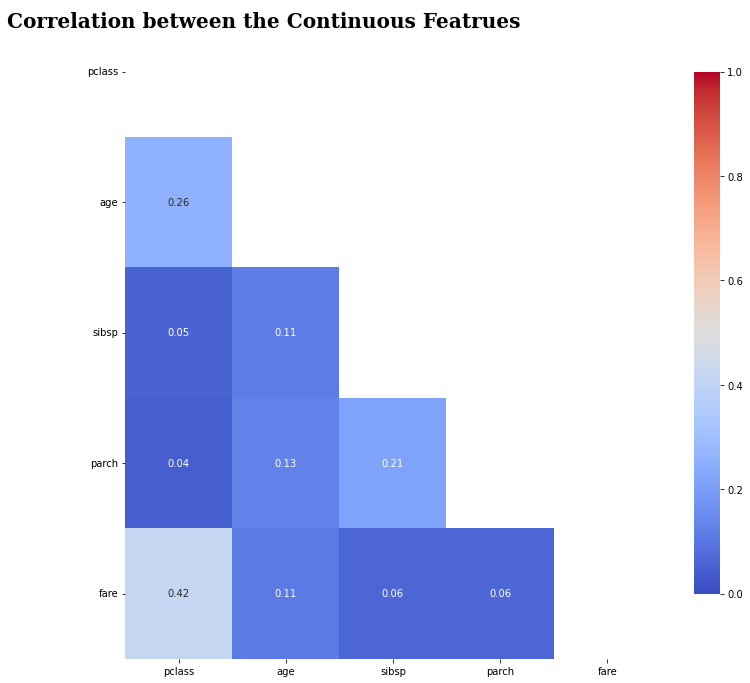

In [24]:
corr = train_df[pure_num_cols].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(12, 12))
ax.text(-1.1, 0.16, "Correlation between the Continuous Featrues", fontsize=20, fontweight='bold', fontfamily='serif')

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, vmin=0, vmax=1)

plt.yticks(rotation=0)
plt.show()

In [28]:
chart_df = pd.DataFrame(train_df[pure_num_cols].corrwith(train_df[target_column]))
chart_df.columns = ['corr']
fig = px.bar(
  chart_df['corr'],
  y='corr',
  title="Correlation of Continuous Features with Target"
)

fig.show()

In [30]:
train_0_df = train_df.loc[train_df[target_column] == 0]
train_1_df = train_df.loc[train_df[target_column] == 1]

num_rows, num_cols = 4,2
fig = make_subplots(rows=num_rows, cols=num_cols)

for index, column in enumerate(train_df[categorical_columns].columns):
    i,j = ((index // num_cols)+1, (index % num_cols)+1)
    data = train_0_df.groupby(column)[column].count().sort_values(ascending=False)
    data = data if len(data) < 10 else data[:10]
    fig.add_trace(go.Bar(
        x = data.index,
        y = data.values,
        name='Label: 0',
        marker_color=pink[2],
        marker_line_color=blue[4],
        marker_line_width=1.5, 
        opacity=0.8,
    ), row=i, col=j)

    data = train_1_df.groupby(column)[column].count().sort_values(ascending=False)
    data = data if len(data) < 10 else data[:10]
    fig.add_trace(go.Bar(
        x = data.index,
        y = data.values,
        name='Label: 1',
        marker_color=blue[2],
        marker_line_color=blue[4],
        marker_line_width=1.5, 
        opacity=0.8,
    ), row=i, col=j)
    
    fig.update_xaxes(
        title=column, 
        type='category', 
        row=i, 
        col=j
    )
    fig.update_layout(barmode='stack')
    
fig.update_layout(
    autosize=False,
    width=800,
    height=1300,
    showlegend=False,
    title='Categorical features',
)
fig.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
le_data = train_df.copy().drop(columns=['passengerid'])

for col in pure_cat_cols:
    le_data[col] = le.fit_transform(le_data[col])  

corrdata = le_data

corr = corrdata.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr1 = corr.mask(mask)

fig = ff.create_annotated_heatmap(
    z=corr1.to_numpy().round(2),
    x=list(corr1.index.values),
    y=list(corr1.columns.values),       
    xgap=3, ygap=3,
    zmin=0, zmax=1,
    colorscale='blugrn',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)

fig.update_layout(
    title_text='Correlation for Categorical Features', 
    font_family="Serif",
    titlefont={'size': 24},
    width=800, height=700,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed',
    margin=dict(l=70, r=70, t=70, b=70, pad=1),
)

fig.show()

In [35]:
temp_combine = pd.concat([train_df, test_df], axis=0)

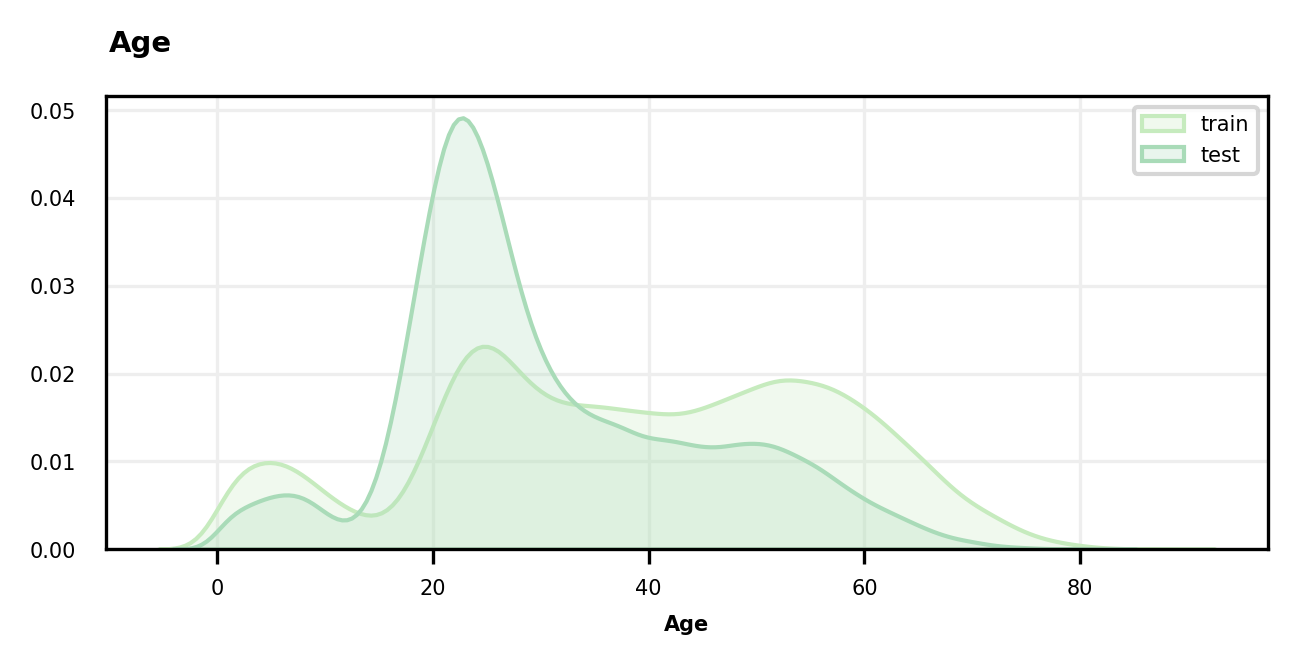

In [37]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-10, 0.056, 'Age', color='black', fontsize=7, ha='left', va='bottom', weight='bold')

ax0_sns = sns.kdeplot(ax=ax0, x=train_df['age'], zorder=2, shade=True)
ax0_sns = sns.kdeplot(ax=ax0, x=test_df['age'], zorder=2, shade=True)

ax0_sns.set_xlabel("Age",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')

ax0.legend(['train', 'test'], prop={'size': 5})
ax0_sns.tick_params(labelsize=5)

plt.show()

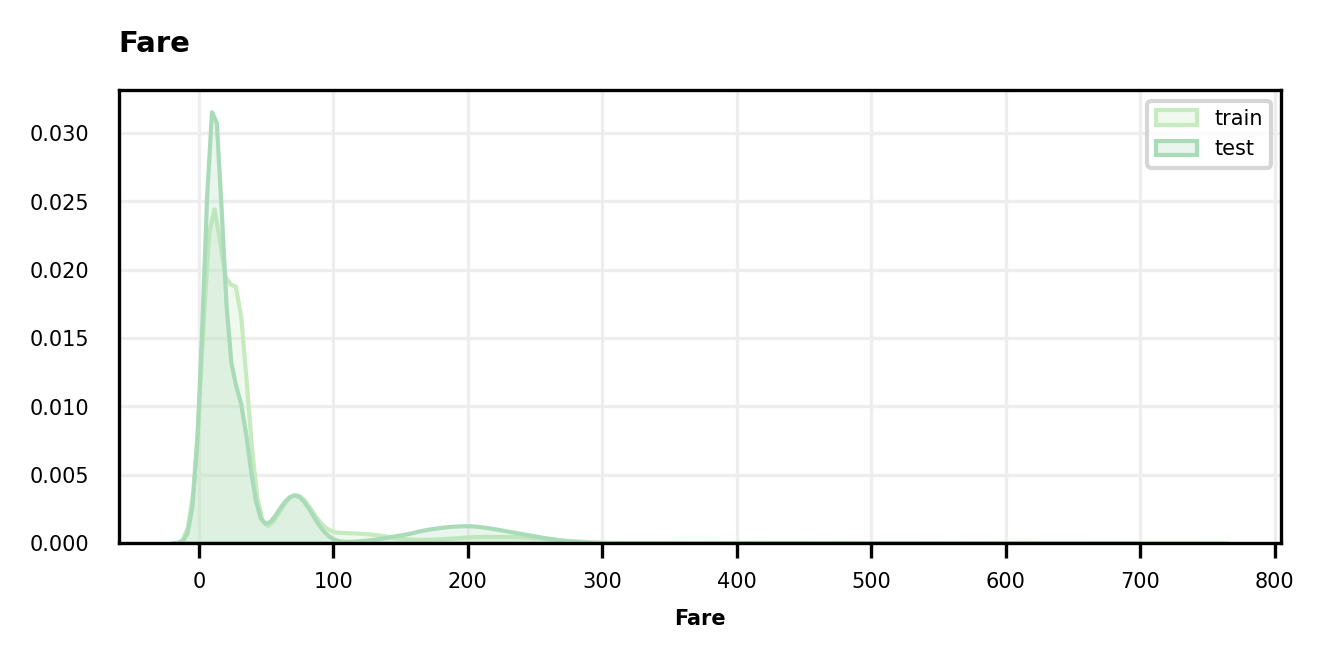

In [38]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-60, 0.0355, 'Fare', color='black', fontsize=7, ha='left', va='bottom', weight='bold')

ax0_sns = sns.kdeplot(ax=ax0, x=train_df['fare'], zorder=2, shade=True)
ax0_sns = sns.kdeplot(ax=ax0, x=test_df['fare'], zorder=2, shade=True)

ax0_sns.set_xlabel("Fare",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')

ax0.legend(['train', 'test'], prop={'size': 5})
ax0_sns.tick_params(labelsize=5)

plt.show()

In [39]:
num_rows, num_cols = 3,2
fig = make_subplots(
    rows=num_rows, 
    cols=num_cols,
    specs=[[{}, {}],
           [{}, {}],
           [{"colspan": 2}, None]],
)

tmp_categorical_columns = list(set(categorical_columns) - set(['name', 'ticket', 'cabin']))

for index, column in enumerate(tmp_categorical_columns):
    i,j = ((index // num_cols)+1, (index % num_cols)+1)
    
    temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
    temp_train['source'] = 'train'
    
    temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
    temp_test['source'] = 'test'
    
    temp_combine = pd.concat([temp_train, temp_test], axis=0)
    
    fig.add_trace(go.Bar(
        x = temp_train['index'],
        y = temp_train[column],
        name='Train',
        marker_color=pink[2],
        marker_line_color=blue[4],
        marker_line_width=1.5, 
        opacity=0.8,
    ), row=i, col=j)

    fig.add_trace(go.Bar(
        x = temp_test['index'],
        y = temp_test[column],
        name='Test',
        marker_color=blue[2],
        marker_line_color=blue[4],
        marker_line_width=1.5, 
        opacity=0.8,
    ), row=i, col=j)
    
    fig.update_xaxes(
        title=column, 
        type='category', 
        row=i, 
        col=j
    )
    fig.update_layout(barmode='group')
    
fig.update_layout(
    autosize=False,
    width=800,
    height=1000,
    showlegend=False,
    title='Categorical features',
)
fig.show()